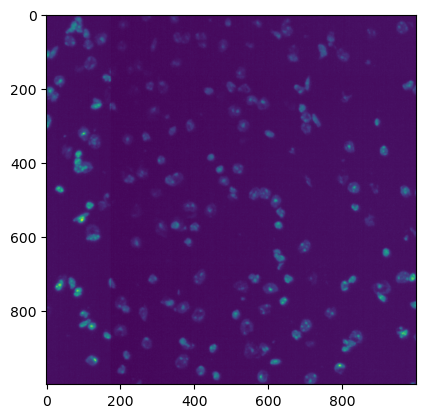

In [38]:
## 13.1 Plot one image ✅
# 1. Unpack the zip file 
# 2. import libraries 
import matplotlib.pyplot as plt 
import skimage as ski
from skimage import io
import glob 
# 3. Read image path and save as variable using matplotlib.pyplot.imshow
image_path = "/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c01_DAPI.tif"
image = io.imread(image_path)

# 4. Plot one image
plt.imshow(image)
plt.show()

In [39]:
## 13.2 Create a list of files 
# 1. Import glob (13.1)

# 2. show all files with X10_Y10_ 

file_list = glob.glob("/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_*.tif")
print(file_list)
# 3. Save the files as a list 
image_list = [io.imread(file) for file in file_list]

# to be sure it worked out: How many files are in the list and show list?
print(f"{len(image_list)}")
print(image_list)
      

['/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c03_Alexa_488.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c02_Alexa_647.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c04_DAPI.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c04_Alexa_488.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c01_Alexa_647.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c02_DAPI.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c03_DAPI.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c04_Atto_425.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_

['/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c03_Alexa_488.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c02_Alexa_647.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c04_DAPI.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c04_Alexa_488.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c01_Alexa_647.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c02_DAPI.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c03_DAPI.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c04_Atto_425.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_

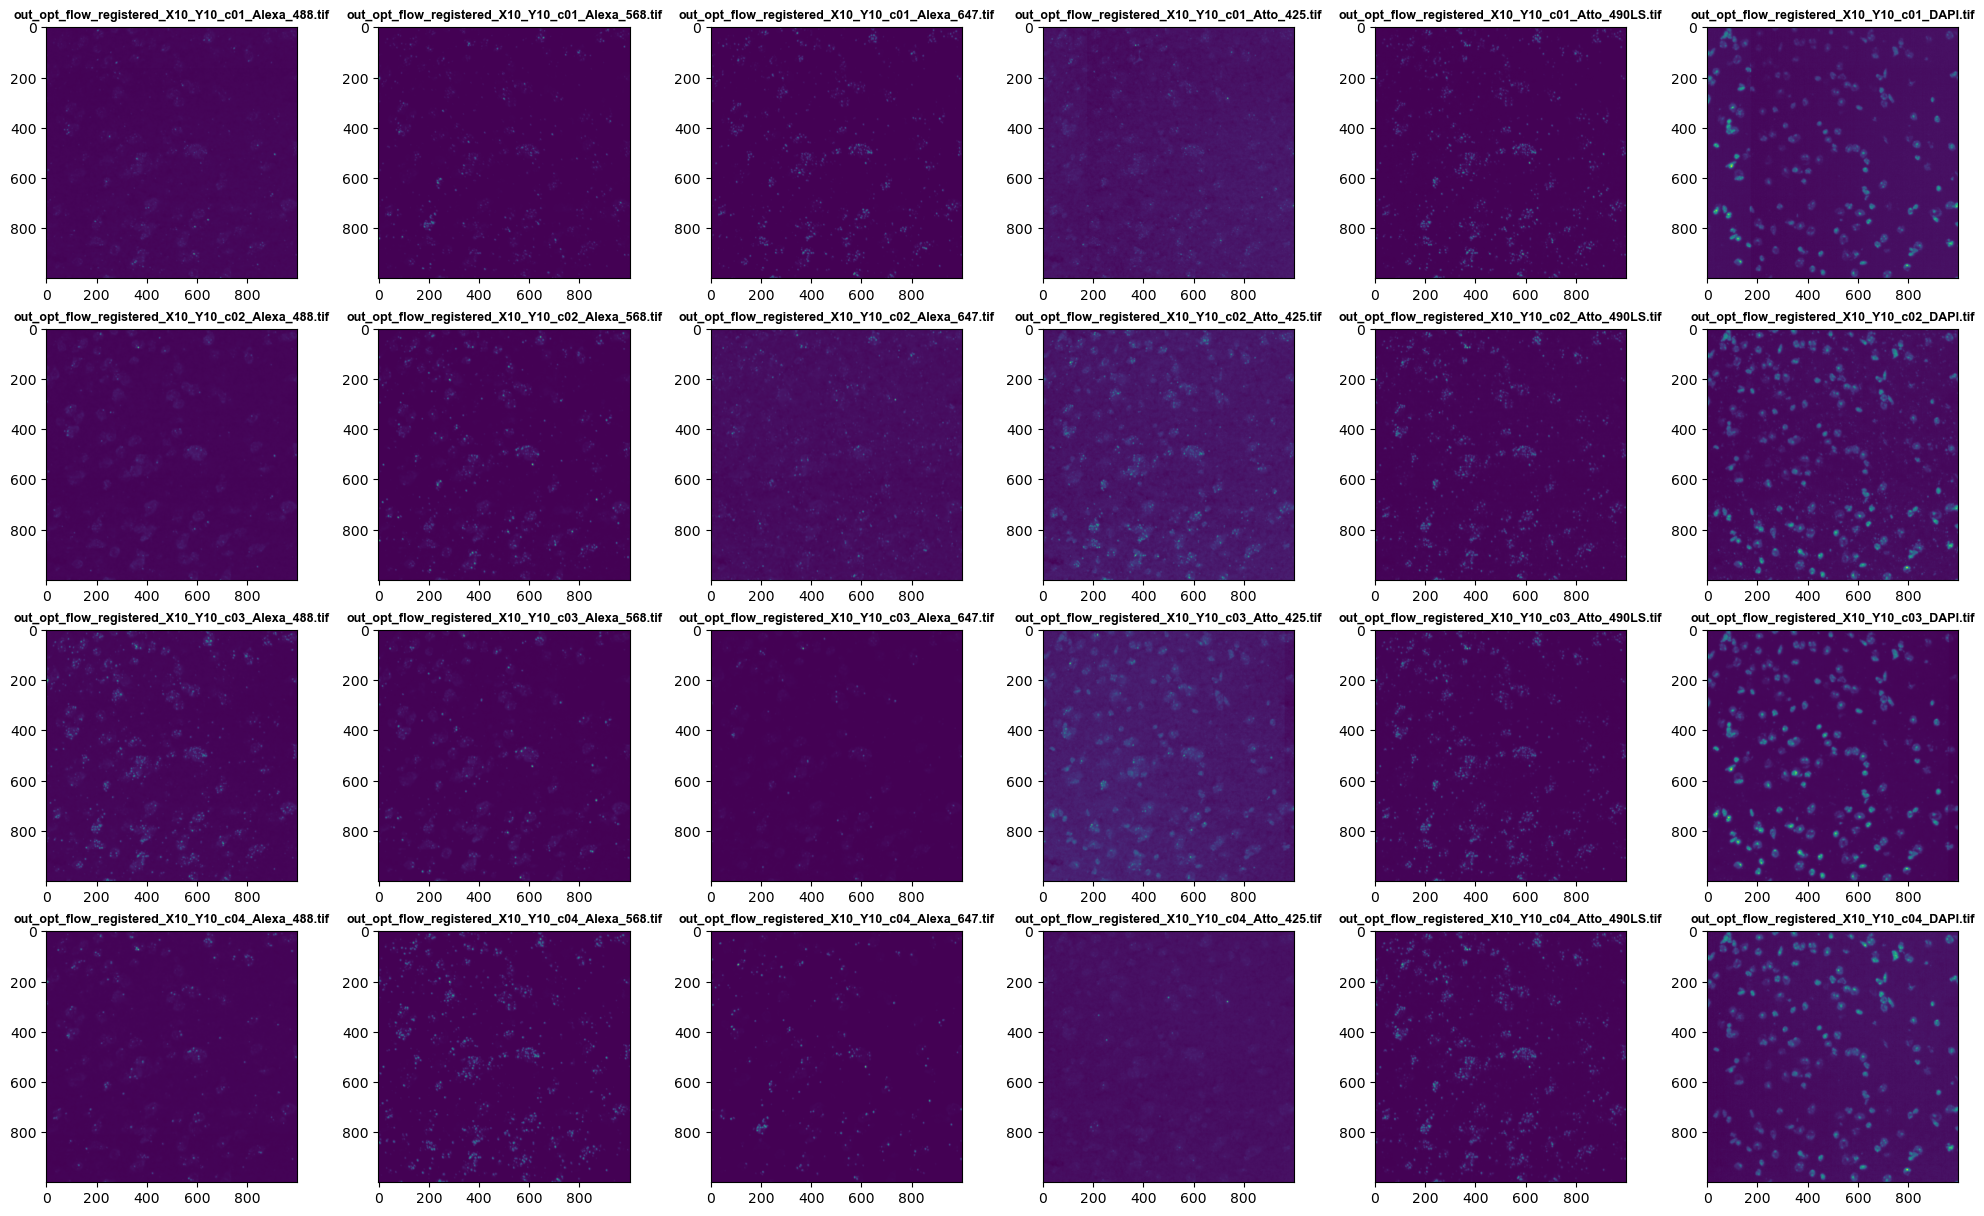

In [40]:
## Create a figure that incoperates all runs of one tile as subplots
# import libraries (13.1)
import os # for filenames 

# all files in file_list (13.2)
file_list = glob.glob("/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_*.tif")
print(file_list)
# Save the files as a list (13.2)
image_list = [io.imread(file) for file in file_list]

# sorting images by defining 
run_of_one_tile = ["c01", "c02", "c03", "c04"]
name_of_dyes = ["Alexa_488", "Alexa_568", "Alexa_647", "Atto_425", "Atto_490LS", "DAPI"]

# Load the list 
image_list = []
image_names = [] #!!! richtige Reihenfolge von zugehörigen Datennamen

# Search for the exact right path
for run in run_of_one_tile:
    for dye in name_of_dyes:
        match = [f for f in file_list if f"_X10_Y10_{run}_{dye}.tif" in f]
        if match:
            image = io.imread(match[0])
            image_list.append(image) # to show the images 
            image_names.append(os.path.basename(match[0]))

# Show the pictures in a grid with 4 rows and 6 colomns
fig, axs = plt.subplots(nrows=4,ncols=6, figsize=(25,15))

for i, ax in enumerate(axs.flatten()): # loop for each subplot (ax) in the grid #flats list for loop
    ax.imshow(image_list[i]) # i = index for all images in image_list ax = plot object for every image
    filename = os.path.basename(file_list[i])
    ax.set_title(image_names[i], fontdict={'fontsize': 9, 'fontweight': 'bold', 'fontname': 'Arial'}) # adds title
plt.show() # shows image

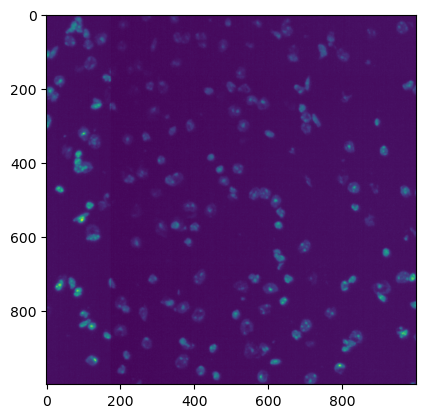

In [41]:
## Test your function

from Functions import plotImage

plotImage()



## 14. Count the number of nuclei in each field of view (fov)

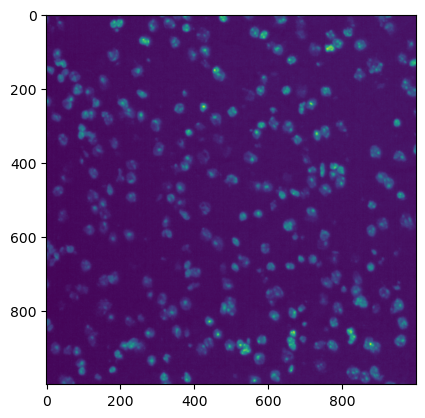

In [42]:
# method to develop a single fov
# nucleus segmentation: DAPI

# import libraries
import skimage as ski 
import matplotlib.pyplot as plt 

image2 = ski.io.imread("/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y8_c04_DAPI.tif")
plt.imshow(image2)

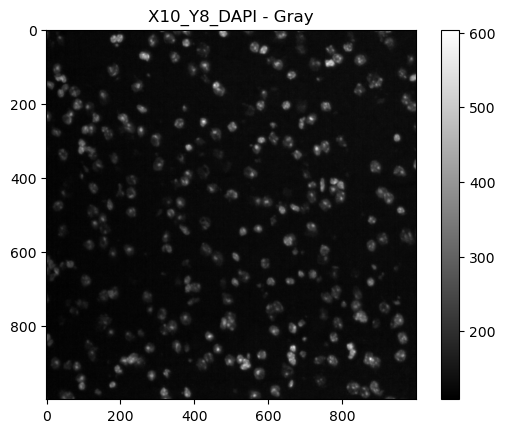

(1000, 1000)

In [43]:
#convert to grey 
# gray_image = ski.color.rgb2gray(image2) Bild bereits 2 nicht drei Kanäle -> rgb2gray nicht notwendig
plt.imshow(image2, cmap="gray")
plt.colorbar()
plt.title("X10_Y8_DAPI - Gray")  
plt.show()

image2.shape

(array([0.00000e+00, 9.23947e+05, 6.02410e+04, 1.34150e+04, 2.20200e+03,
        1.94000e+02]),
 array([  0., 100., 200., 300., 400., 500., 600.]),
 <BarContainer object of 6 artists>)

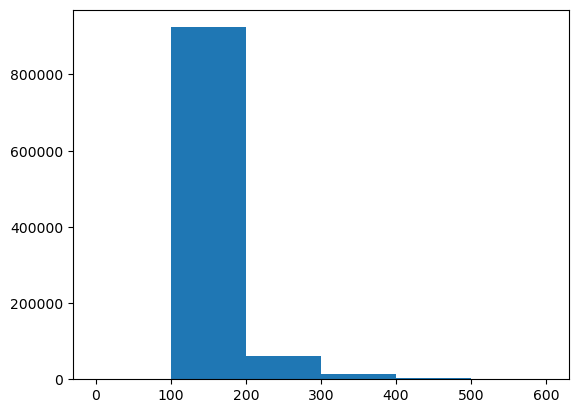

In [44]:
# highest number of pixel in range 100
image2.flatten().shape
plt.hist(image2.flatten(), bins=6, range=(0,600))

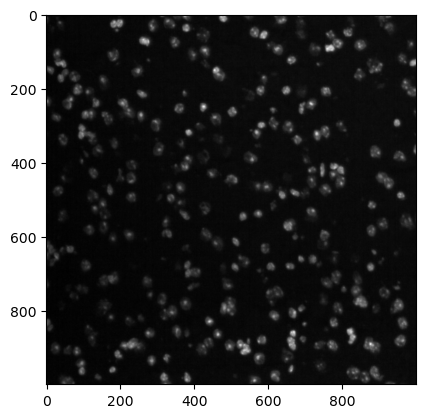

In [45]:
# Blurrring 
import skimage as ski
import matplotlib.pyplot as plt

blurred_image2 = ski.filters.gaussian(image2, sigma= 0.5) # sigma: controlls the amount of blurring (high sigma - more blur)
plt.imshow(blurred_image2, cmap="gray" )

Min pixel value: 0.0016821296855597007
Max pixel value: 0.00901738904516427


(-0.5, 999.5, 999.5, -0.5)

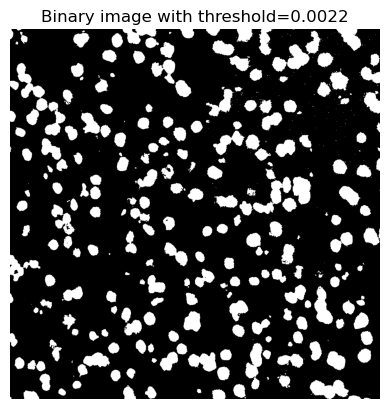

In [46]:
#Threshold searching manuell

print("Min pixel value:", blurred_image2.min()) # shows the pixel value 
print("Max pixel value:", blurred_image2.max())

threshold = 0.0022
threshold_image = blurred_image2 > threshold 
plt.imshow(threshold_image, cmap='gray')
plt.title(f"Binary image with threshold={threshold}")
plt.axis('off')

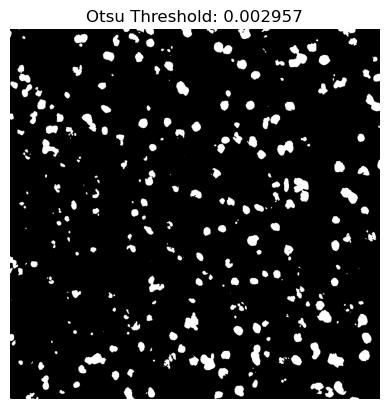

Zellkerne nach einfachem Otsu-Schwellwert: 331


In [47]:
#Threshold with Otsu
from skimage.filters import threshold_otsu
threshold_Otsu = threshold_otsu(blurred_image2)
threshold_image_Otsu = blurred_image2 > threshold_Otsu

plt.imshow(threshold_image_Otsu, cmap='gray')
plt.title(f"Otsu Threshold: {threshold_Otsu:.6f}")
plt.axis('off')
plt.show()

# count nucleus
from skimage import measure

# label white dots
labels_otsu = measure.label(threshold_image_Otsu)

# count white dos and show them 
nuclei_otsu = labels_otsu.max()
print(f"Zellkerne nach einfachem Otsu-Schwellwert: {nuclei_otsu}")




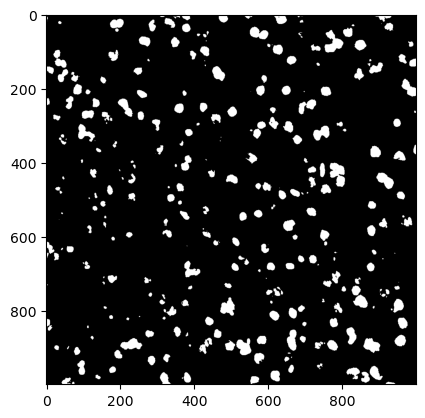

In [48]:
# Create binary mask 
mask = blurred_image2 > 0.0029
mask
plt.imshow(mask, cmap="gray")



Nuclei count: 328


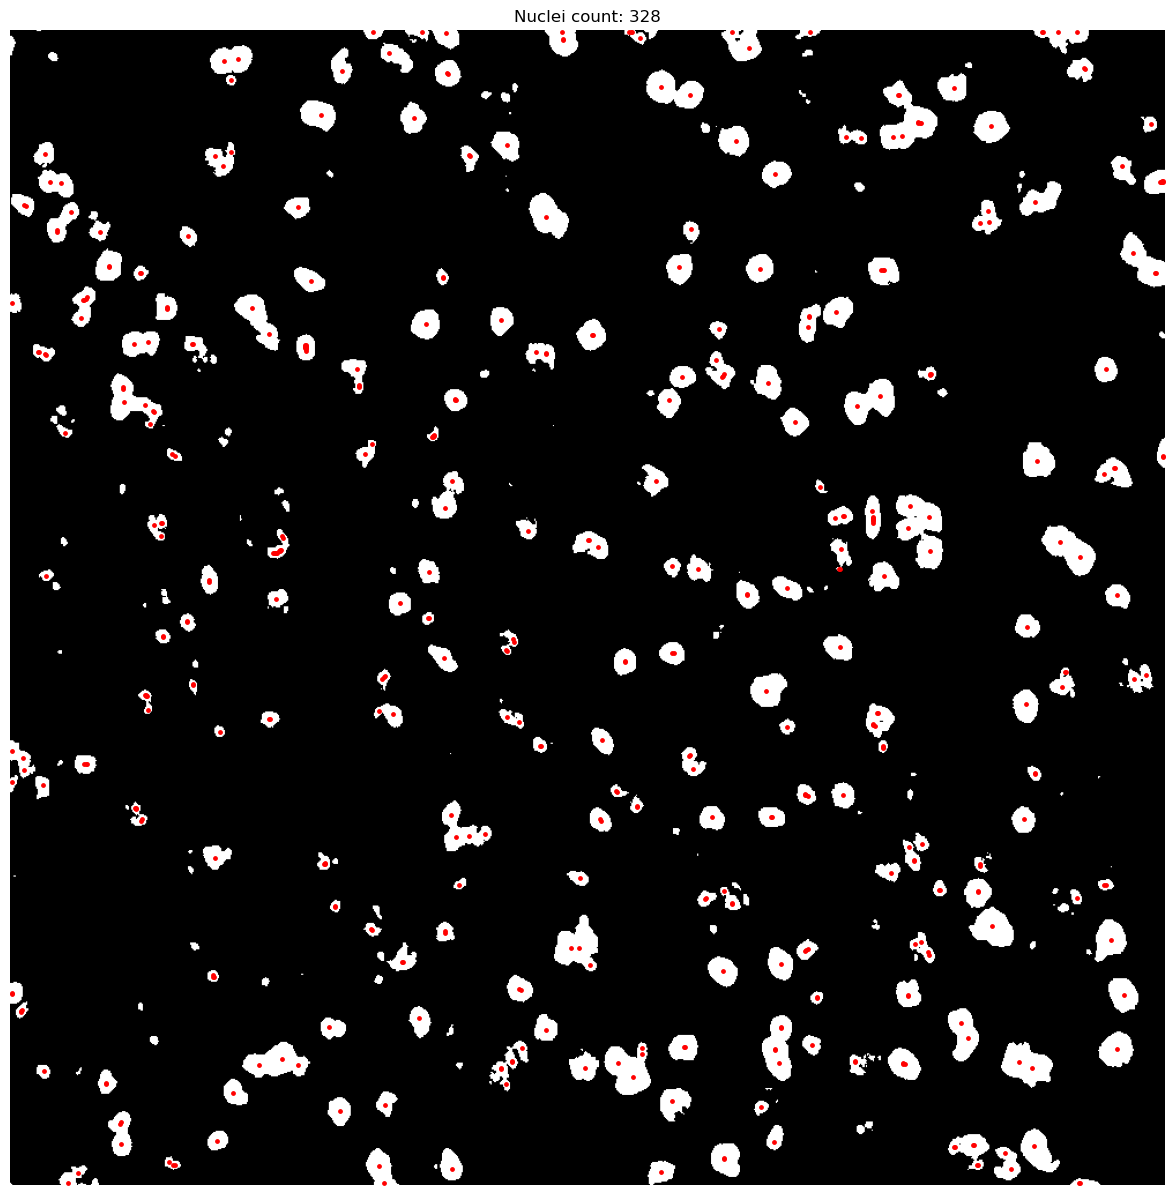

In [49]:
# separate touching nuclei and counting nuclei

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, measure, morphology, segmentation, feature
from scipy import ndimage as ndi

# remove small objects that are no nuclei
removed = morphology.remove_small_objects(threshold_image_Otsu)

# create a map where you have the nuclei as highest value and background as lowest 
distance = ndi.distance_transform_edt(removed)

# get the coordinates of the local maxima which are the nuclei
nuclei_coords = feature.peak_local_max(distance, labels=removed, footprint=np.ones((10, 10))) # distance between nuclei can be adjusted with footprint

# mask is important for Watershed
# empty mask
local_maxi = np.zeros_like(distance, dtype=bool)

# max in a mask -> true for markerdots and false for background
local_maxi[tuple(nuclei_coords.T)] = True 


#  Label of max
markers = ndi.label(local_maxi)[0]

# Watershed to seperate touching cells
seperate_nuclei = segmentation.watershed(-distance, markers, mask=removed)

# count all nuclei
n_nuclei = np.max(seperate_nuclei)
print(f"Nuclei count: {n_nuclei}")

# show result in image

plt.figure(figsize=(15,15))
plt.imshow(threshold_image_Otsu, cmap='gray')
plt.scatter(nuclei_coords[:, 1], nuclei_coords[:, 0], color='red', s=6)
plt.title(f"Nuclei count: {n_nuclei}")
plt.axis('off')
plt.show()




Processing /Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y2_c01_DAPI.tif
Number of nuclei in /Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y2_c01_DAPI.tif: 210


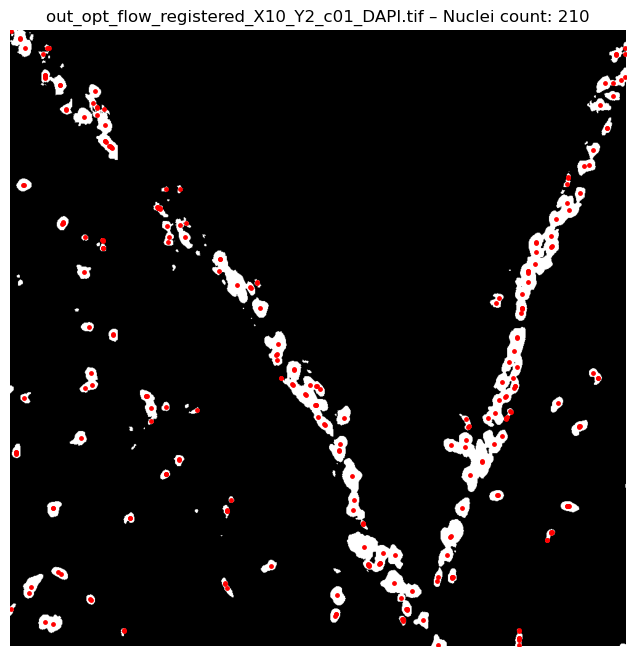

Processing /Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y2_c02_DAPI.tif
Number of nuclei in /Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y2_c02_DAPI.tif: 235


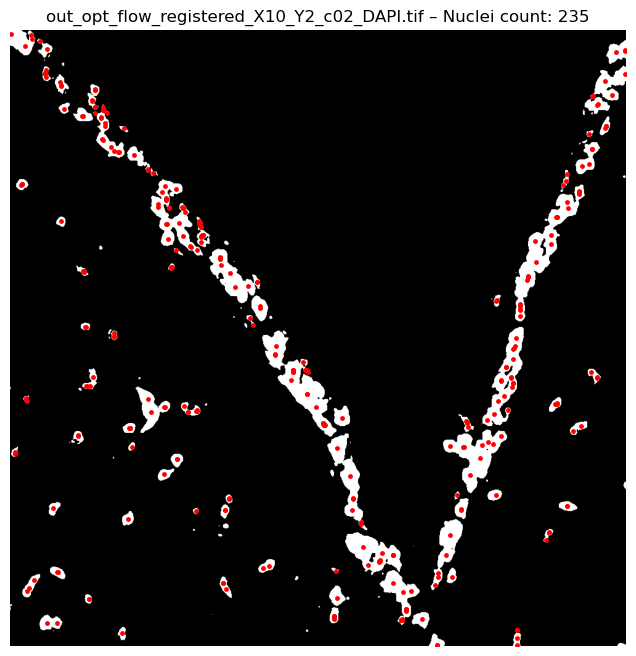

Processing /Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y6_c02_DAPI.tif
Number of nuclei in /Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y6_c02_DAPI.tif: 379


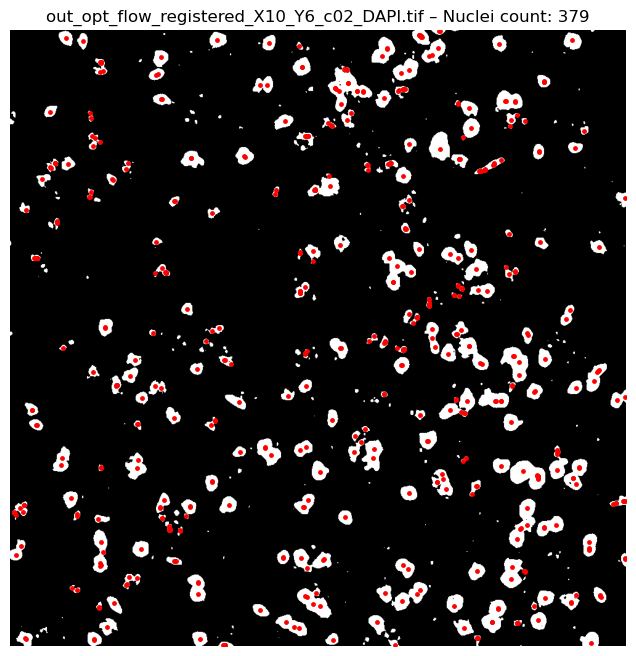

Processing /Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y3_c01_DAPI.tif
Number of nuclei in /Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y3_c01_DAPI.tif: 219


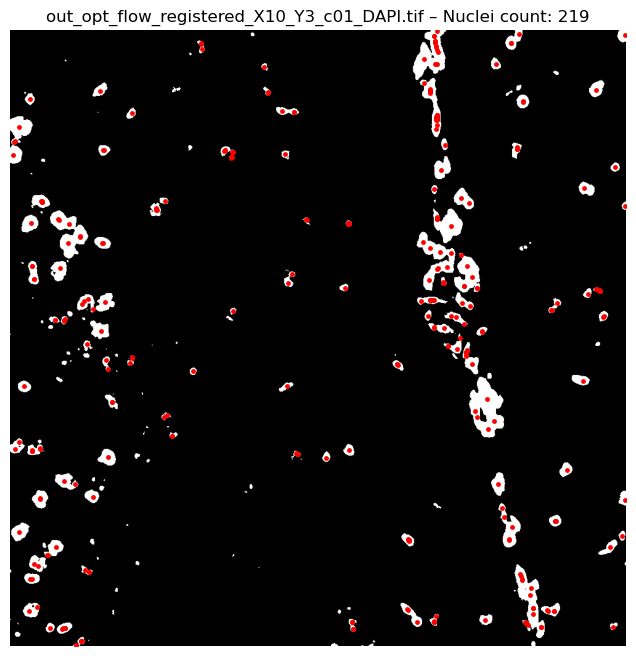

In [50]:
import skimage as ski
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import numpy as np
from skimage import morphology, segmentation, feature
from scipy import ndimage as ndi

# Liste mit Bildpfaden
image_paths = [
    "/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y2_c01_DAPI.tif",
    "/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y2_c02_DAPI.tif",
    "/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y6_c02_DAPI.tif",
    "/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y3_c01_DAPI.tif"]

for image_path in image_paths:
    print(f"Processing {image_path}")

    # load image
    image = ski.io.imread(image_path)

    # Blurring
    blurred_image = ski.filters.gaussian(image, sigma=0.5)

    # Otsu-Schthreshold
    threshold_val = threshold_otsu(blurred_image)
    threshold_image = blurred_image > threshold_val

    # Remove small objects
    removed = morphology.remove_small_objects(threshold_image, min_size=64)

    # Distancetransformation
    distance = ndi.distance_transform_edt(removed)

    # Local maxima
    nuclei_coords = feature.peak_local_max(distance, labels=removed, footprint=np.ones((10, 10)))

    # create mask für markers
    local_maxi = np.zeros_like(distance, dtype=bool)
    local_maxi[tuple(nuclei_coords.T)] = True

    # label markers
    markers = ndi.label(local_maxi)[0]

    # Watershed for segmentation
    separate_nuclei = segmentation.watershed(-distance, markers, mask=removed)

    # count nuclei
    n_nuclei = np.max(separate_nuclei)
    print(f"Number of nuclei in {image_path}: {n_nuclei}")

    # show plot
    plt.figure(figsize=(8,8))
    plt.imshow(threshold_image, cmap='gray')
    plt.scatter(nuclei_coords[:, 1], nuclei_coords[:, 0], color='red', s=6)
    plt.title(f"{image_path.split('/')[-1]} – Nuclei count: {n_nuclei}")
    plt.axis('off')
    plt.show()



In [51]:
## 14.2 

import matplotlib.pyplot as plt 
import skimage as ski
from skimage import io
import glob 
from skimage.filters import threshold_otsu
import numpy as np
from skimage import morphology, segmentation, feature
from scipy import ndimage as ndi # for multidimensional image processing
import os
import csv


# Search for all files with DAPI in it 
file_selected_tiles_DAPI = glob.glob("/Users/jonahofmann/onboarding-base-module/data/selected-tiles/*DAPI*.tif")
print(file_selected_tiles_DAPI)

# Save the files as a list 
image_list_DAPI = [io.imread(file) for file in file_selected_tiles_DAPI]

# How many files are in the list 
#print(f"{len(image_list_DAPI)}")

# create folder for plots 
output_folder = "diagnostic_plots"
os.makedirs(output_folder, exist_ok=True) #creates folder only if it does not exist

all_counted_DAPI_nuclei = 0 

# create CSV-file to write
with open("nuclei_count.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile) # to write in this script
    writer.writerow(["image name", "nuclei counted"]) 


    for file in file_selected_tiles_DAPI:
        #print(f"Processing {file}")

        # load image
        image = ski.io.imread(file)

        # Blurring
        blurred_image = ski.filters.gaussian(image, sigma=0.5)

        # Otsu-Schthreshold
        threshold_val = threshold_otsu(blurred_image)
        threshold_image = blurred_image > threshold_val

        # Remove small objects
        removed = morphology.remove_small_objects(threshold_image, min_size=64)

        # Distancetransformation
        distance = ndi.distance_transform_edt(removed)

        # Local maxima
        nuclei_coords = feature.peak_local_max(distance, labels=removed, footprint=np.ones((10, 10)))

        # create mask für markers
        local_maxi = np.zeros_like(distance, dtype=bool)
        local_maxi[tuple(nuclei_coords.T)] = True

        # label markers
        markers = ndi.label(local_maxi)[0]

        # Watershed for segmentation
        separate_nuclei = segmentation.watershed(-distance, markers, mask=removed)

        # count nuclei
        n_nuclei = np.max(separate_nuclei)
        print(f"Number of nuclei in {file}: {n_nuclei}")
        all_counted_DAPI_nuclei += n_nuclei
    
        # Copy in CSV
        writer.writerow([os.path.basename(file), n_nuclei])

        # show plot
        plt.figure(figsize=(8,8))
        plt.imshow(threshold_image, cmap='gray')
        plt.scatter(nuclei_coords[:, 1], nuclei_coords[:, 0], color='red', s=6)
        plt.title(f"{file.split('/')[-1]} – Nuclei count: {n_nuclei}")
        plt.axis('off')
        #plt.show()
        plot_path = os.path.join(output_folder, os.path.basename(file).replace(".tif", "_diagnose.png"))
        plt.savefig(plot_path)
        plt.close()

        # Copy in CSV
        writer.writerow([os.path.basename(file), n_nuclei])

        # show plot
        plt.figure(figsize=(8,8))
        plt.imshow(threshold_image, cmap='gray')
        plt.scatter(nuclei_coords[:, 1], nuclei_coords[:, 0], color='red', s=6)
        plt.title(f"{file.split('/')[-1]} – Nuclei count: {n_nuclei}")
        plt.axis('off')
        #plt.show()
        plot_path = os.path.join(output_folder, os.path.basename(file).replace(".tif", "_diagnose.png"))
        plt.savefig(plot_path)
        plt.close()

print(f"Total nuclei from all DAPI images: {all_counted_DAPI_nuclei}")




['/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X19_Y14_c02_DAPI.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X19_Y14_c03_DAPI.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X19_Y5_c03_DAPI.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X19_Y5_c02_DAPI.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X17_Y13_c04_DAPI.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X14_Y13_c01_DAPI.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X16_Y8_c04_DAPI.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X17_Y1_c01_DAPI.tif', '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X19_Y13_c02_DAPI.tif', '/Users/jonah

In [52]:
# Fehler beheben im csv

import pandas as pd

# CSV-Datei einlesen
df = pd.read_csv("nuclei_count.csv", header=None, names=["image name", "nuclei counted"])

# 2. Doppelte Zeilen entfernen
df = df.drop_duplicates()
df
df.to_csv("nuclei_count_cleaned.csv", index=False)


In [53]:
import pandas as pd
import re

# CSV laden
df = pd.read_csv("nuclei_count_cleaned.csv")

# Robuster: FOV extrahieren – wenn kein Match, dann NaN
def extract_fov(filename):
    match = re.search(r'X\d+_Y\d+', filename)
    return match.group() if match else None

df["FOV"] = df["image name"].apply(extract_fov)

df["nuclei counted"] = pd.to_numeric(df["nuclei counted"], errors="coerce")

# Zeilen ohne FOV (z. B. fehlerhafte Namen) entfernen
df = df.dropna(subset=["FOV"])

# Mittelwert je FOV berechnen
mean_counts = df.groupby("FOV")["nuclei counted"].mean().reset_index()

# Ergebnis speichern
mean_counts.to_csv("mean_nuclei_counts_per_FOV.csv", index=False)
print(mean_counts)


         FOV  nuclei counted
0    X10_Y10          234.50
1    X10_Y11          294.25
2    X10_Y12          378.25
3    X10_Y13          352.00
4    X10_Y14          261.75
..       ...             ...
185   X23_Y4         2110.50
186   X23_Y5           45.00
187   X23_Y6           63.25
188   X23_Y7           75.25
189   X23_Y8           50.75

[190 rows x 2 columns]


Processing /Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X23_Y4_c01_DAPI.tif
Number of nuclei in /Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X23_Y4_c01_DAPI.tif: 7987


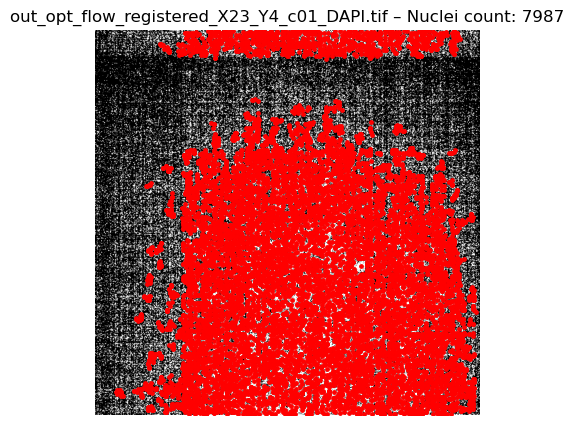

Processing /Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X23_Y4_c02_DAPI.tif
Number of nuclei in /Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X23_Y4_c02_DAPI.tif: 11


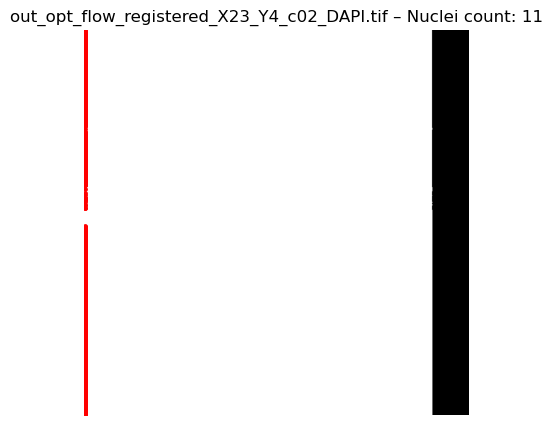

Processing /Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X23_Y4_c03_DAPI.tif
Number of nuclei in /Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X23_Y4_c03_DAPI.tif: 8


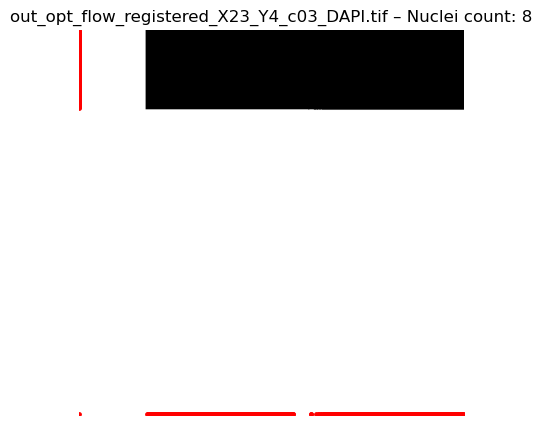

Processing /Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X23_Y4_c04_DAPI.tif
Number of nuclei in /Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X23_Y4_c04_DAPI.tif: 10


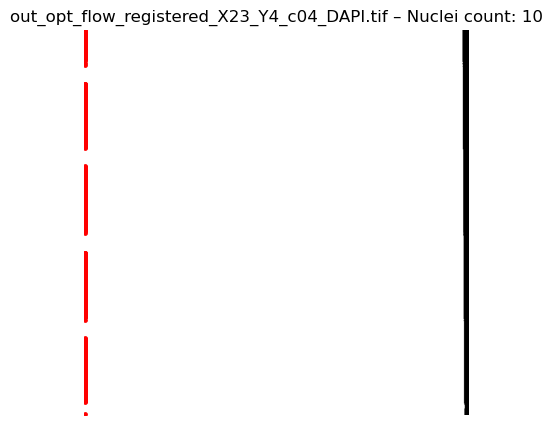

In [54]:
import skimage as ski
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import numpy as np
from skimage import morphology, segmentation, feature
from scipy import ndimage as ndi

# Liste mit Bildpfaden
image_paths = [
    "/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X23_Y4_c01_DAPI.tif",
    "/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X23_Y4_c02_DAPI.tif",
    "/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X23_Y4_c03_DAPI.tif",
    "/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X23_Y4_c04_DAPI.tif"]

for image_path in image_paths:
    print(f"Processing {image_path}")

    # load image
    image = ski.io.imread(image_path)
  

    # Blurring
    blurred_image = ski.filters.gaussian(image, sigma=0.5)

    # Otsu-Schthreshold
    threshold_val = threshold_otsu(blurred_image)
    threshold_image = blurred_image > threshold_val

    # Remove small objects
    removed = morphology.remove_small_objects(threshold_image, min_size=100)

    # Distancetransformation
    distance = ndi.distance_transform_edt(removed)

    # Local maxima
    nuclei_coords = feature.peak_local_max(distance, labels=removed, footprint=np.ones((10, 10)))

    # create mask für markers
    local_maxi = np.zeros_like(distance, dtype=bool)
    local_maxi[tuple(nuclei_coords.T)] = True

    # label markers
    markers = ndi.label(local_maxi)[0]

    # Watershed for segmentation
    separate_nuclei = segmentation.watershed(-distance, markers, mask=removed)

    # count nuclei
    n_nuclei = np.max(separate_nuclei)
    print(f"Number of nuclei in {image_path}: {n_nuclei}")

    # show plot
    plt.figure(figsize=(5,5))
    plt.imshow(threshold_image, cmap='gray')
    plt.scatter(nuclei_coords[:, 1], nuclei_coords[:, 0], color='red', s=6)
    plt.title(f"{image_path.split('/')[-1]} – Nuclei count: {n_nuclei}")
    plt.axis('off')
    plt.show()


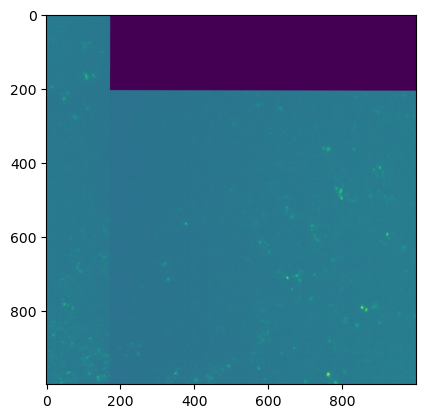

In [55]:

import matplotlib.pyplot as plt 
import skimage as ski
from skimage import io
import glob 

image_path = "/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X23_Y4_c03_DAPI.tif"
image = io.imread(image_path)

# 4. Plot one image
plt.imshow(image)
plt.show()

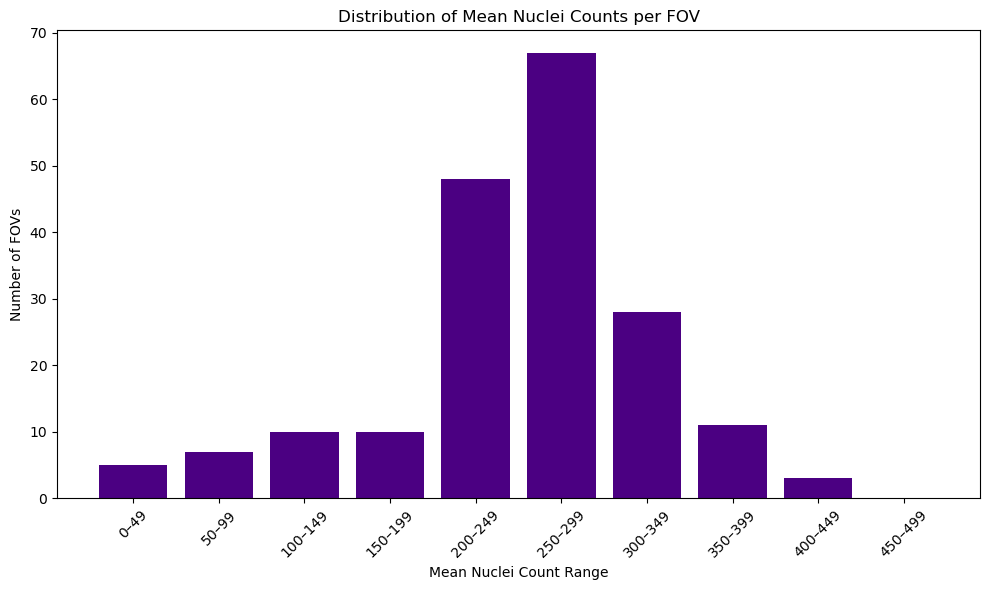

In [56]:
# Plot mean counts without X23_Y4
# Total nuclei from all DAPI images: 196852 - 8016 (X23_Y4) = 188836
import matplotlib.pyplot as plt
from collections import defaultdict

mean_count = """
X10_Y10,234.5
X10_Y11,294.25
X10_Y12,378.25
X10_Y13,352.0
X10_Y14,261.75
X10_Y15,265.5
X10_Y2,220.25
X10_Y3,231.5
X10_Y4,308.0
X10_Y5,342.25
X10_Y6,360.25
X10_Y7,335.0
X10_Y8,345.25
X10_Y9,353.25
X11_Y1,126.5
X11_Y10,179.25
X11_Y11,280.0
X11_Y12,287.5
X11_Y13,256.25
X11_Y14,270.75
X11_Y15,276.0
X11_Y2,247.75
X11_Y3,292.75
X11_Y4,273.75
X11_Y5,283.5
X11_Y6,277.25
X11_Y7,306.0
X11_Y8,289.75
X11_Y9,257.25
X12_Y0,116.25
X12_Y1,265.0
X12_Y10,197.75
X12_Y11,219.75
X12_Y12,215.5
X12_Y13,201.25
X12_Y14,192.25
X12_Y15,225.75
X12_Y2,249.0
X12_Y3,242.25
X12_Y4,295.0
X12_Y5,264.75
X12_Y6,299.0
X12_Y7,325.5
X12_Y8,336.25
X12_Y9,275.0
X13_Y0,105.25
X13_Y1,289.0
X13_Y10,251.5
X13_Y11,301.5
X13_Y12,290.0
X13_Y13,265.25
X13_Y14,253.75
X13_Y15,220.0
X13_Y2,241.5
X13_Y3,237.25
X13_Y4,303.5
X13_Y5,347.75
X13_Y6,306.0
X13_Y7,346.5
X13_Y8,300.0
X13_Y9,266.0
X14_Y0,112.75
X14_Y1,276.75
X14_Y10,264.5
X14_Y11,358.25
X14_Y12,329.5
X14_Y13,295.0
X14_Y14,253.0
X14_Y15,299.75
X14_Y16,41.5
X14_Y2,234.0
X14_Y3,256.0
X14_Y4,353.25
X14_Y5,371.5
X14_Y6,330.0
X14_Y7,357.5
X14_Y8,351.5
X14_Y9,267.75
X15_Y0,105.75
X15_Y1,276.75
X15_Y10,245.0
X15_Y11,374.75
X15_Y12,260.25
X15_Y13,270.75
X15_Y14,231.75
X15_Y15,227.25
X15_Y2,235.5
X15_Y3,204.25
X15_Y4,293.0
X15_Y5,344.25
X15_Y6,275.25
X15_Y7,368.5
X15_Y8,327.5
X15_Y9,286.0
X16_Y0,83.75
X16_Y1,297.25
X16_Y10,238.75
X16_Y11,250.75
X16_Y12,207.5
X16_Y13,321.5
X16_Y14,178.25
X16_Y15,157.25
X16_Y2,270.0
X16_Y3,241.25
X16_Y4,301.25
X16_Y5,306.75
X16_Y6,271.0
X16_Y7,283.75
X16_Y8,297.0
X16_Y9,264.25
X17_Y0,65.75
X17_Y1,238.75
X17_Y10,207.75
X17_Y11,215.0
X17_Y12,213.5
X17_Y13,345.75
X17_Y14,301.75
X17_Y15,87.75
X17_Y2,255.25
X17_Y3,230.5
X17_Y4,223.75
X17_Y5,316.25
X17_Y6,299.0
X17_Y7,254.5
X17_Y8,232.25
X17_Y9,203.5
X18_Y1,175.5
X18_Y10,256.5
X18_Y11,238.75
X18_Y12,414.25
X18_Y13,333.5
X18_Y14,210.75
X18_Y2,274.0
X18_Y3,212.75
X18_Y4,226.5
X18_Y5,284.5
X18_Y6,337.0
X18_Y7,272.5
X18_Y8,225.25
X18_Y9,214.25
X19_Y1,94.25
X19_Y10,241.0
X19_Y11,402.5
X19_Y12,283.0
X19_Y13,301.0
X19_Y14,14.0
X19_Y2,240.25
X19_Y3,252.5
X19_Y4,243.25
X19_Y5,254.5
X19_Y6,260.5
X19_Y7,328.25
X19_Y8,232.5
X19_Y9,227.75
X20_Y10,160.5
X20_Y11,401.5
X20_Y12,263.0
X20_Y13,125.0
X20_Y2,116.25
X20_Y3,299.75
X20_Y4,255.75
X20_Y5,239.5
X20_Y6,239.75
X20_Y7,248.5
X20_Y8,241.25
X20_Y9,255.25
X21_Y10,173.5
X21_Y11,224.0
X21_Y12,100.25
X21_Y2,24.75
X21_Y3,161.75
X21_Y4,276.0
X21_Y5,302.5
X21_Y6,260.5
X21_Y7,250.5
X21_Y8,259.0
X21_Y9,266.0
X22_Y10,130.0
X22_Y3,31.25
X22_Y4,144.25
X22_Y5,286.5
X22_Y6,266.75
X22_Y7,240.75
X22_Y8,191.75
X22_Y9,209.5
X23_Y5,45.0
X23_Y6,63.25
X23_Y7,75.25
X23_Y8,50.75
"""

# create dictionary
mean_counts = dict(line.split(",") for line in mean_count.strip().split("\n"))
mean_counts = {k: float(v) for k, v in mean_counts.items()}

# create bins
bin_edges = list(range(0, 550, 50))  
bin_labels = [f"{start}–{end-1}" for start, end in zip(bin_edges[:-1], bin_edges[1:])]

# Zählen,count the fovs of each bin
from collections import defaultdict
binned_counts = defaultdict(int)

for count in mean_counts.values():
    for i in range(len(bin_edges) - 1):
        if bin_edges[i] <= count < bin_edges[i + 1]:
            binned_counts[bin_labels[i]] += 1
            break

# Fehlende Bins mit 0 ergänzen
for label in bin_labels:
    binned_counts.setdefault(label, 0)

# Sort the bins
binned_counts = dict(sorted(binned_counts.items(), key=lambda x: int(x[0].split("–")[0])))

# show Plot
plt.figure(figsize=(10, 6))
plt.bar(binned_counts.keys(), binned_counts.values(), color='#4B0082')
plt.ylabel("Number of FOVs")
plt.xlabel("Mean Nuclei Count Range")
plt.title("Distribution of Mean Nuclei Counts per FOV")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


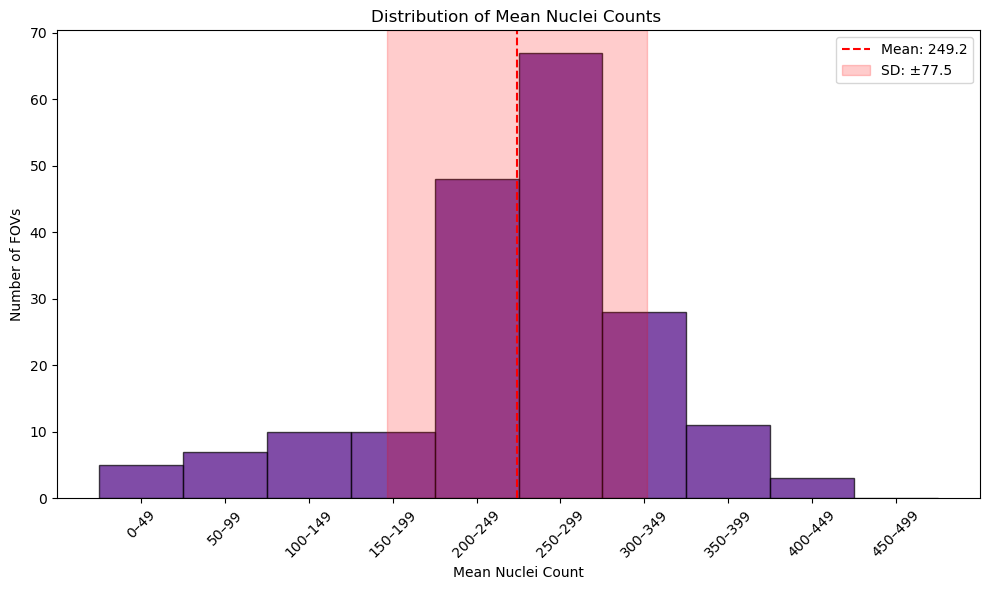

In [57]:
import matplotlib.pyplot as plt
import numpy as np

values = list(mean_counts.values())

mean_val = np.mean(values)
std_val = np.std(values)

# Define bins and labels
bin_edges = list(range(0, 550, 50))  # x-axe
bin_labels = [f"{start}–{end-1}" for start, end in zip(bin_edges[:-1], bin_edges[1:])]
bin_centers = [(start + end) / 2 for start, end in zip(bin_edges[:-1], bin_edges[1:])]

# show the Plot
plt.figure(figsize=(10,6))
plt.hist(values, bins=bin_edges, color='#4B0082', alpha=0.7, edgecolor='black')
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
plt.axvspan(mean_val - std_val, mean_val + std_val, color='red', alpha=0.2, label=f'SD: ±{std_val:.1f}')
plt.xlabel('Mean Nuclei Count')
plt.ylabel('Number of FOVs')
plt.title('Distribution of Mean Nuclei Counts ')
plt.xticks(bin_centers, bin_labels, rotation=45) 
plt.legend()
plt.tight_layout()
plt.show()


In [58]:
# count per fov to a csv file with mean and sd

import pandas as pd
import numpy as np
import re
from collections import defaultdict

# read csv 
df = pd.read_csv("nuclei_count_cleaned.csv")

# create a dictionary to store counts per FOV
fov_counts = defaultdict(list)

# iterate over the rows
for idx, row in df.iterrows():
    filename = row['image name']
    try:
        count = int(row['nuclei counted'])
    except ValueError:
        print(f"Warnung: Ungültiger Wert in Zeile {idx}: {row['nuclei counted']}")
        continue

    
    match = re.search(r'X\d+_Y\d+', filename)
    if match:
        fov_name = match.group(0)
        fov_counts[fov_name].append(count)
    else:
        print(f"Warnung: Konnte FOV-Namen nicht extrahieren aus {filename}")
# create then a new list for the dataframe
rows = []

for fov, counts in sorted(fov_counts.items()):
    
    while len(counts) < 4:
        counts.append(None)

    valid_counts = [c for c in counts if c is not None]
    mean_val = np.mean(valid_counts)
    std_val = np.std(valid_counts)

    rows.append([fov] + counts + [mean_val, std_val])

# Create a DataFrame with the headed columns
df_grouped = pd.DataFrame(rows, columns=["FOV Name", "C1", "C2", "C3", "C4", "Mean", "SD"])

# save into a new CSV file
df_grouped.to_csv("fov_grouped_stats.csv", index=False)

print("CSV mit gruppierten Counts, Mittelwert und SD erstellt: fov_grouped_stats.csv")



Warnung: Ungültiger Wert in Zeile 0: nuclei counted
CSV mit gruppierten Counts, Mittelwert und SD erstellt: fov_grouped_stats.csv


In [59]:
# Show the CSV

import pandas as pd
df = pd.read_csv("fov_grouped_stats.csv")
df

FOV Name   C1   C2   C3    C4     Mean           SD
0    X10_Y10  236  276  233   193   234.50    29.364094
1    X10_Y11  312  287  315   263   294.25    21.063891
2    X10_Y12  361  388  397   367   378.25    14.754237
3    X10_Y13  349  347  349   363   352.00     6.403124
4    X10_Y14  226  258  297   266   261.75    25.262373
..       ...  ...  ...  ...   ...      ...          ...
185   X23_Y4    8   11   10  8413  2110.50  3638.750232
186   X23_Y5   52   38   48    42    45.00     5.385165
187   X23_Y6   58   75   59    61    63.25     6.869316
188   X23_Y7   74   80   78    69    75.25     4.205651
189   X23_Y8   53   44   53    53    50.75     3.897114

[190 rows x 7 columns]

In [60]:
# 15 
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, feature
import glob
import os


path_of_FOV = "/Users/jonahofmann/onboarding-base-module/data/selected-tiles/"
tif_files = glob.glob(os.path.join(path_of_FOV, "*.tif"))
n_cycles = 4
relative_threshold = 0.15  # relativ threshold für blob detection
four_base_channels = {
    'A': "Atto_425",
    'C': "Alexa_488",
    'G': "Alexa_568",
    'T': "Alexa_647"
}
max_distance = 3  # max distance für blob detection
#atto_channel_name = "Atto_490LS"  # Name des geheimnisvollen Kanals
#radius = 3

# Liste/dictonary für einzelne base pro Cyclus
dict_base_in_cycle = {}

#  Daten filtern damit DAPI und Atto_490LS nicht dabei sind; nur 4 Basen mit Schleife
for file in tif_files:
    filename = os.path.basename(file)

    # DAPI und Atto_490LS ausschließen
    if "DAPI" in filename or "Atto_490LS" in filename:
        continue

    # FOV aus Dateiname ziehen, z.B. "X14_Y1"
    fov_parts = [p for p in filename.split("_") if p.startswith("X") and "Y" in p]
    if len(fov_parts) == 0:
        continue  # Falls kein FOV, überspringen
    fov = fov_parts[0]

    # Zyklus ermitteln (z.B. c01)
    cycle_parts = [p for p in filename.split("_") if p.startswith("c")]
    if len(cycle_parts) == 0:
        continue
    cycle = int(cycle_parts[0][1:]) - 1  # Zyklus 0-basiert

    # Base ermitteln
    base = None
    for b, channel_name in four_base_channels.items():
        if channel_name in filename:
            base = b
            break
    if base is None:
        continue

    # Initialisieren, falls noch nicht vorhanden
    if fov not in dict_base_in_cycle:
        dict_base_in_cycle[fov] = {}
    if cycle not in dict_base_in_cycle[fov]:
        dict_base_in_cycle[fov][cycle] = {b: None for b in four_base_channels.keys()}

    # Datei speichern
    dict_base_in_cycle[fov][cycle][base] = file

# Ausgabe zum Überprüfen
from pprint import pprint
pprint(dict_base_in_cycle)



{}


In [61]:
# 15.1

import os
import glob
from pprint import pprint
from skimage import filters
from skimage import feature
from skimage import io


path_of_FOV = "/Users/jonahofmann/onboarding-base-module/data/selected-tiles/"
tif_files = glob.glob(os.path.join(path_of_FOV, "*.tif"))
n_cycles = 4

four_base_channels = {
    'A': "Atto_425",
    'C': "Alexa_488",
    'G': "Alexa_568",
    'T': "Alexa_647"
}

dict_fov_cycle_base = {}

for file in tif_files:
    filename = os.path.basename(file)

    # Skip unwanted channels
    if "DAPI" in filename or "Atto_490LS" in filename:
        continue

    # FOV detection for X and Y
    parts = filename.split("_")
    fov = None
    for i, part in enumerate(parts):
        if part.startswith("X") and i+1 < len(parts) and parts[i+1].startswith("Y"):
            fov = f"{part}_{parts[i+1]}"
            break
   
   
    # Cycle detection
    cycle_parts = [p for p in filename.split("_") if p.startswith("c") and len(p) == 3]
    if len(cycle_parts) == 0:
        continue
    try:
        cycle = int(cycle_parts[0][1:]) - 1  # "c01" -> 0
    except ValueError:
        continue

    # Base detection
    base = None
    for b, channel_name in four_base_channels.items():
        if channel_name in filename:
            base = b
            break
    if base is None:
        continue

    # Struktur aufbauen
    if fov not in dict_fov_cycle_base:
        dict_fov_cycle_base[fov] = {}
    if cycle not in dict_fov_cycle_base[fov]:
        dict_fov_cycle_base[fov][cycle] = {b: None for b in four_base_channels.keys()}
    dict_fov_cycle_base[fov][cycle][base] = file

# Ergebnis zeigen
print("\n✅ Structure of dict:")
pprint(dict_fov_cycle_base)


detected_spots = {}

# Iterate over each FOV
for fov, cycles in dict_fov_cycle_base.items():
    detected_spots[fov] = {}
    # Iterate over each cycle
    for cycle, bases in cycles.items():
        detected_spots[fov][cycle] = {}
        # Iterate over each base
        for base, file in bases.items():
            if file is None:
                continue  

            image = io.imread(file)
            dog = filters.difference_of_gaussians(image, low_sigma=1, high_sigma=3)
            peaks = feature.peak_local_max(dog, threshold_rel=relative_threshold, min_distance=2)
            detected_spots[fov][cycle][base] = peaks

print("\n✅ spots detected.")





✅ Structure of dict:
{'X10_Y10': {0: {'A': '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c01_Atto_425.tif',
                 'C': '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c01_Alexa_488.tif',
                 'G': '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c01_Alexa_568.tif',
                 'T': '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c01_Alexa_647.tif'},
             1: {'A': '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c02_Atto_425.tif',
                 'C': '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c02_Alexa_488.tif',
                 'G': '/Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y10_c02_Alexa_568.tif',
                 'T'

In [ ]:
#15.2 Spot linking and barcode decoding
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, feature
import glob
import os
from scipy.spatial import cKDTree

all_sequences = []  # List to store all sequences

for fov, cycles in detected_spots.items(): # iterate through every fov
    spots_connected_cycle0 = []
    for base, spots in cycles[0].items(): # iterate through every base
        for spot in spots:
            spots_connected_cycle0.append({
                "fov": fov,
                "sequence": base,
                "pos": spot
            })
            

    # follow the detected spot of cycle0 trhough all cycles
    for spot_dict in spots_connected_cycle0:
        pos = spot_dict["pos"]
        seq = spot_dict["sequence"]

        for cycle in range(1, n_cycles):
            found_base = "N" # if you cant find any base, it is N
            for base, spots in cycles[cycle].items():
                if len(spots) == 0:
                    continue
                # Check if the spot is within max_distance of the previous spot
                tree = cKDTree(spots) # search for nearest neighbors
                distances, indices = tree.query(pos,distance_upper_bound=max_distance)
                if distances < max_distance:
                    found_base = base 
                    pos = spots[indices]
                    break  
            seq += found_base

    # found the base and save the position for the next cycle
        all_sequences.append((spot_dict["fov"], spot_dict["pos"][0], spot_dict["pos"][1], seq))

# 15.2 Compare results with corresponding gene in taglist and recognize genes

import pandas as pd

path_to_taglist = "/Users/jonahofmann/onboarding-base-module/data/taglist.csv"
taglist = pd.read_csv(path_to_taglist) # read the taglist.csv
barcode_to_gene = dict(zip(taglist["Code"].str.strip().str.upper(), taglist["Name"]))
# create a dictionary with barcode and gene, first code then name !!!!
print(barcode_to_gene)

barcode_decoding_results = []
for fov, x, y, barcode in all_sequences:
    if barcode.count("N") > 1:
        gene = "invalid" # assign unknown barcodes to invalid
    else:
        gene = barcode_to_gene.get(barcode, "invalid") # get the gene from the barcode or assign invalid if not found
    barcode_decoding_results.append({
        "fov": fov,
        "x": x,
        "y": y,
        "barcode": barcode,
        "gene": gene
    })

# save the results in a csv file
barcode_df = pd.DataFrame(barcode_decoding_results, columns=["fov", "x", "y", "barcode", "gene"])
print("\n✅ Barcode decoding results:")
barcode_df.to_csv("barcode_decoding_results.csv", index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Analyse the barcode decoding results
barcode_df = pd.read_csv("barcode_decoding_results.csv")
valid_seqs = barcode_df[~barcode_df["barcode"].str.contains("N")]
print(f"✅ Valid sequencing without 'N': {len(valid_seqs)}")

barcode_counts = valid_seqs["barcode"].value_counts()
print("\nSorted barcode counts:")
print(barcode_counts.sort_values)




✅ Valid sequencing without 'N': 118578

Sorted barcode counts:
<bound method Series.sort_values of barcode
TACG    37449
AACG     7374
GTCC     5555
TGCG     4692
TTGC     4085
        ...  
ATGA        1
GGTT        1
AAGA        1
TTCA        1
CATT        1
Name: count, Length: 241, dtype: int64>


In [ ]:
## see the code in Visualize.py to open all FOVs in napari

# 15.3 Visualize the results in napari
# opens images for one FOV and shows the decoded spots in napari
import napari
import os
import numpy as np
import pandas as pd
from skimage import io

# configuration
fov = "X10_Y5"  # fov example 
path_selected_tiles = "/Users/jonahofmann/onboarding-base-module/data/selected-tiles"
n_cycles = 4
bases = ['A', 'C', 'G', 'T']
base_colors = {'A': 'magenta','G': 'green', 'C': 'red', 'T': 'yellow'}

# spots and sequences from barcode_decoding_results.csv
# Load barcode decoding results
barcode_df = pd.read_csv("barcode_decoding_results.csv")

# filter for the selected FOV and remove invalid barcodes
barcode_df = barcode_df[(barcode_df["fov"] == fov) & (~barcode_df["barcode"].str.contains("N"))]

#Load images and add them to napari viewer
viewer = napari.Viewer()

for cycle in range(1, n_cycles + 1):  # c01 to c04
    for base in bases:
        if base == 'A':
            dye = "Atto_425"
        
        elif base == 'C':
            dye = "Alexa_488"
        
        elif base == 'T':
            dye = "Alexa_647"

        filename = f"out_opt_flow_registered_{fov}_c0{cycle}_{dye}.tif"
        path = os.path.join(path_selected_tiles, filename)

        if os.path.exists(path):
            image = io.imread(path)
            viewer.add_image(
                image,
                name=f"{base}_cycle{cycle}",
                colormap=base_colors[base],
                blending="additive",
                contrast_limits=[0, np.percentile(image, 99)]
            )
        else:
            print(f"data not found {path}")

# now add the decoded spots to the napari viewer
spot_coords = barcode_df[["y", "x"]].values  # important: y first, then x for napari
properties = {
    "barcode": barcode_df["barcode"].values,
    "gene": barcode_df["gene"].values
}
viewer.add_points(
    spot_coords,
    name="Decoded Spots",
    face_color="white",
    size=6,
    properties=properties,
    text={
        "string": "{gene}",
        "size": 8,
        "color": "white",
        "anchor": "upper_right"
    }
)

# Search for DAPI image and add it to the viewer
dapi_image = None
for cycle in range(1, n_cycles + 1):
    dapi_filename = f"out_opt_flow_registered_{fov}_c0{cycle}_DAPI.tif"
    dapi_path = os.path.join(path_selected_tiles, dapi_filename)
    if os.path.exists(dapi_path):
        dapi_image = io.imread(dapi_path)
        print(f"found DAPI !!!: {dapi_path}")
        break

if dapi_image is not None:
    viewer.add_image(dapi_image, name="DAPI", colormap="blue", blending="additive")
else:
    print(f" no DAPI found for {fov} ")


napari.run()  # Start the napari viewer



found DAPI !!!: /Users/jonahofmann/onboarding-base-module/data/selected-tiles/out_opt_flow_registered_X10_Y5_c01_DAPI.tif


In [ ]:
# 15.4 

import pandas as pd

# load the barcode decoding results done in 15.2 
df = pd.read_csv("barcode_decoding_results.csv")

# count the spots and sort them by FOV and gene
summary = df.groupby(["fov", "gene"]).size().reset_index(name="count")

# save the summary to a CSV file
summary.to_csv("gene_counts_by_fov.csv", index=False)

print("Saved gene_counts_by_fov.csv")



Saved gene_counts_by_fov.csv


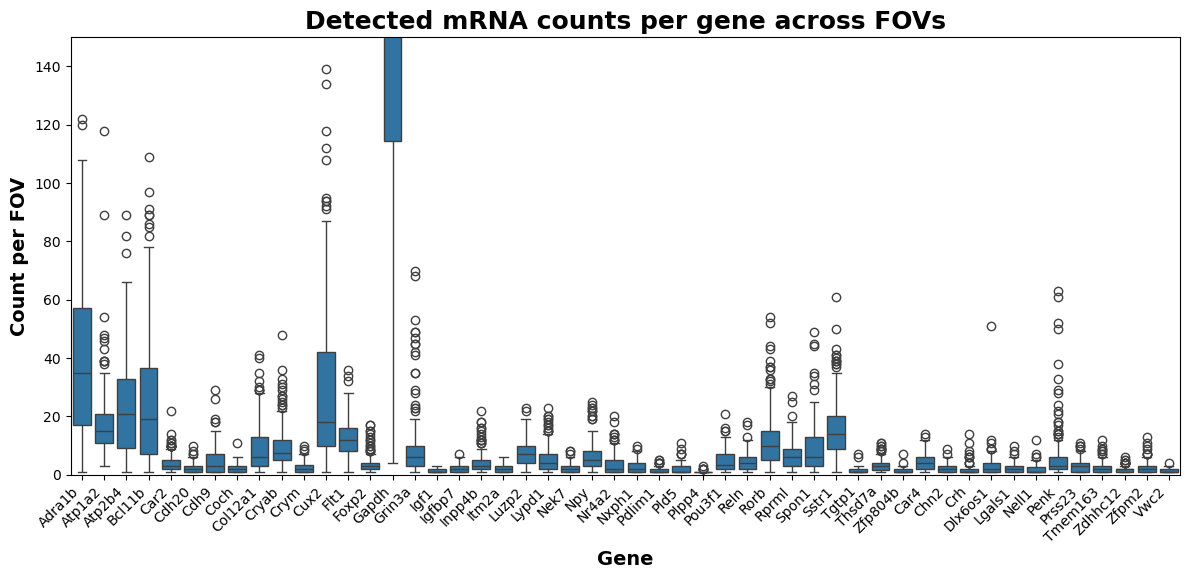

In [ ]:
# Plots für die Ergebnisse Aufgabe 15

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load CSV file with gene counts
df = pd.read_csv("gene_counts_by_fov.csv")

# remove genes with "invalid" counts
df = df[df["gene"] != "invalid"]

# Boxplot 
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="gene", y="count")

plt.ylim(0, 150)
plt.xticks(rotation=90)
plt.title("Detected mRNA counts per gene across FOVs", fontsize=18, fontweight='bold')
plt.ylabel("Count per FOV", fontsize=14, fontweight='bold')
plt.xlabel("Gene", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.xticks(rotation=45, ha='right') 

plt.show()




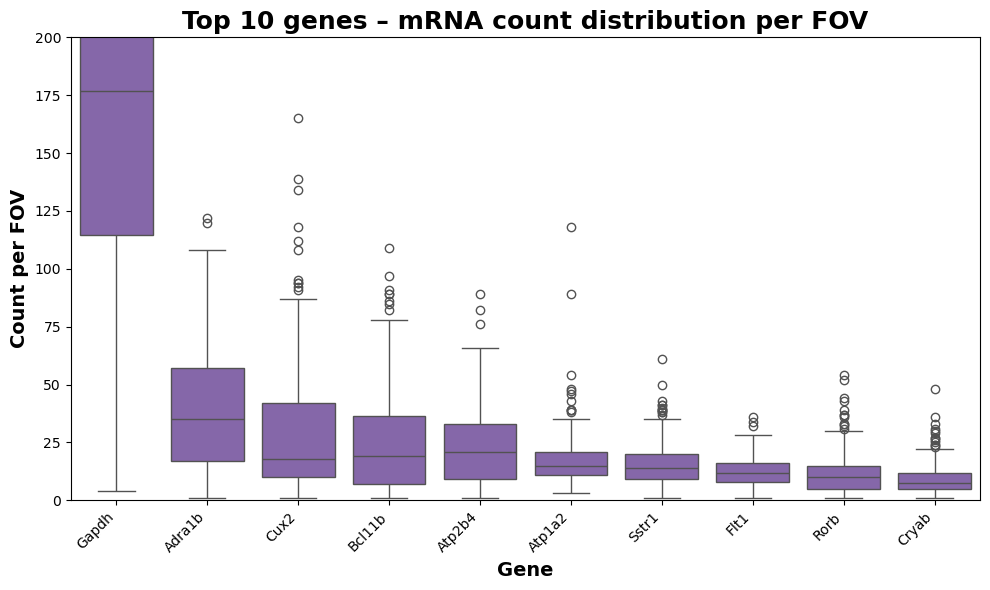

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 Gene nach Gesamtanzahl – ohne alphabetische Sortierung
top_genes = df.groupby("gene")["count"].sum().nlargest(10).index
df_top = df[df["gene"].isin(top_genes)].copy()

# Sortierreihenfolge für die x-Achse festlegen
df_top["gene"] = pd.Categorical(df_top["gene"], categories=top_genes, ordered=True)

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top, x="gene", y="count", color="#845cb4")  # Helllila

plt.xticks(rotation=45, ha='right')
plt.ylim(0, 200)

plt.title("Top 10 genes – mRNA count distribution per FOV", fontsize=18, fontweight='bold')
plt.ylabel("Count per FOV", fontsize=14, fontweight='bold')
plt.xlabel("Gene", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


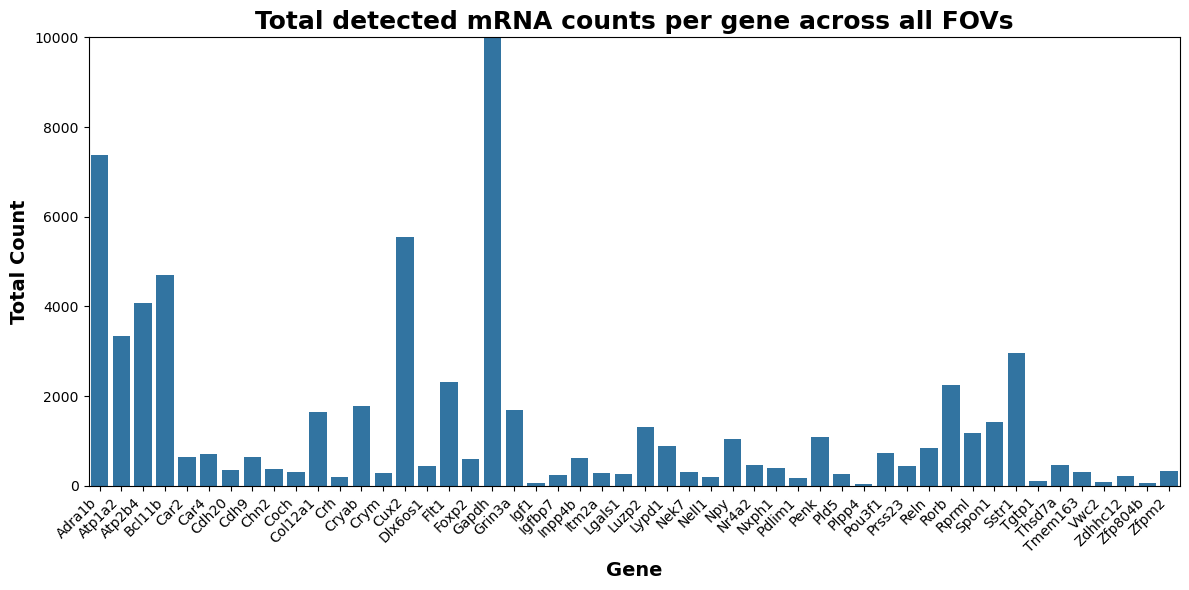

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("gene_counts_by_fov.csv")

df = df[df["gene"] != "invalid"]

gene_counts = df.groupby("gene")["count"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=gene_counts, x="gene", y="count", )
plt.xticks(rotation=45, ha='right')
plt.title("Total detected mRNA counts per gene across all FOVs", fontsize=18, fontweight='bold')
plt.ylabel("Total Count", fontsize=14, fontweight='bold')
plt.xlabel("Gene", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.ylim(0,10000)
plt.show()



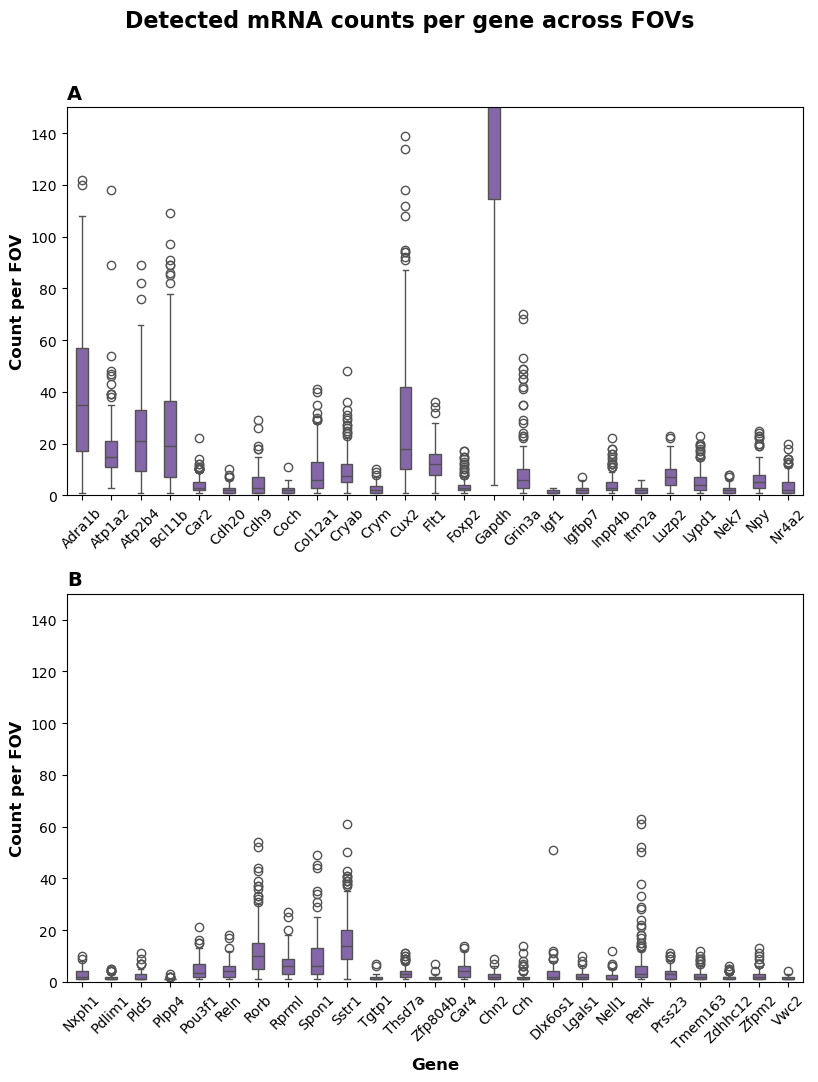

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("gene_counts_by_fov.csv")
df = df[df["gene"] != "invalid"]

# gene in two halves split
unique_genes = df["gene"].unique()
half = len(unique_genes) // 2
genes_A = unique_genes[:half]
genes_B = unique_genes[half:]

# A4 
fig, axes = plt.subplots(2, 1, figsize=(8.3, 11.0), sharey=True)

# Plot A
sns.boxplot(data=df[df["gene"].isin(genes_A)], x="gene", y="count", ax=axes[0], 
            width=0.4, color="#845cb4")
axes[0].set_title("A", loc='left', fontsize=14, fontweight='bold')
axes[0].set_ylabel("Count per FOV", fontsize=12, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xlabel("")
axes[0].set_ylim(0, 150)

# Plot B
sns.boxplot(data=df[df["gene"].isin(genes_B)], x="gene", y="count", ax=axes[1], 
            width=0.4, color="#845cb4")
axes[1].set_title("B", loc='left', fontsize=14, fontweight='bold')
axes[1].set_ylabel("Count per FOV", fontsize=12, fontweight='bold')
axes[1].set_xlabel("Gene", fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 150)

# titel 
fig.suptitle("Detected mRNA counts per gene across FOVs", fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("gene_counts_boxplot_A4_lilac.pdf")
plt.show()



/var/folders/p_/sl2wg6tx4rzgdybfg8pvyvc40000gn/T/ipykernel_56772/358378490.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=spot_counts, x="method", y="spot_count", palette="pastel")


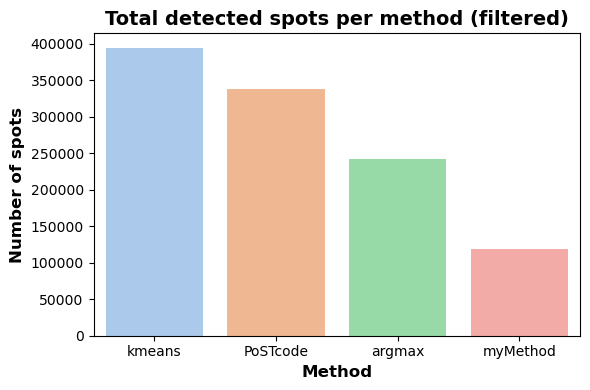

     method  spot_count
2    kmeans      394498
0  PoSTcode      338395
1    argmax      241999
3  myMethod      118578


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data from the CSV file
df_own = pd.read_csv("/Users/jonahofmann/onboarding-base-module/code/barcode_decoding_results.csv")

# filter for invalid,..
df_own = df_own[~df_own["gene"].isin(["invalid", "infeasible", "background"])]

# detected spots for myMethod
df_own['spot_count'] = 118578

df_own["method"] = "myMethod"  

methods = {
    "argmax": "/Users/jonahofmann/onboarding-base-module/data/decoding/NT_ISS_KR0018_argmax.csv",
    "kmeans": "/Users/jonahofmann/onboarding-base-module/data/decoding/NT_ISS_KR0018_kmeans.csv",
    "PoSTcode": "/Users/jonahofmann/onboarding-base-module/data/decoding/NT_ISS_KR0018_PoSTcode.csv"
}

dfs = [df_own]

# Load other methods and filter invalid entries
for method, path in methods.items():
    df = pd.read_csv(path)
    df = df[~df["Name"].isin(["invalid", "infeasible", "background"])]
    df["method"] = method
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)

# count spots for each method
spot_counts_other = df_all[df_all["method"] != "myMethod"].groupby("method").size().reset_index(name="spot_count")

spot_counts_own = pd.DataFrame({"method": ["myMethod"], "spot_count": [118578]})


# Combine the counts
spot_counts = pd.concat([spot_counts_other, spot_counts_own], ignore_index=True)
# sort the counts
spot_counts = spot_counts.sort_values(by="spot_count", ascending=False)


plt.figure(figsize=(6,4))
sns.barplot(data=spot_counts, x="method", y="spot_count", palette="pastel")
plt.title("Total detected spots per method (filtered)", fontsize=14, fontweight='bold')
plt.ylabel("Number of spots", fontsize=12, fontweight='bold')
plt.xlabel("Method", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print(spot_counts)


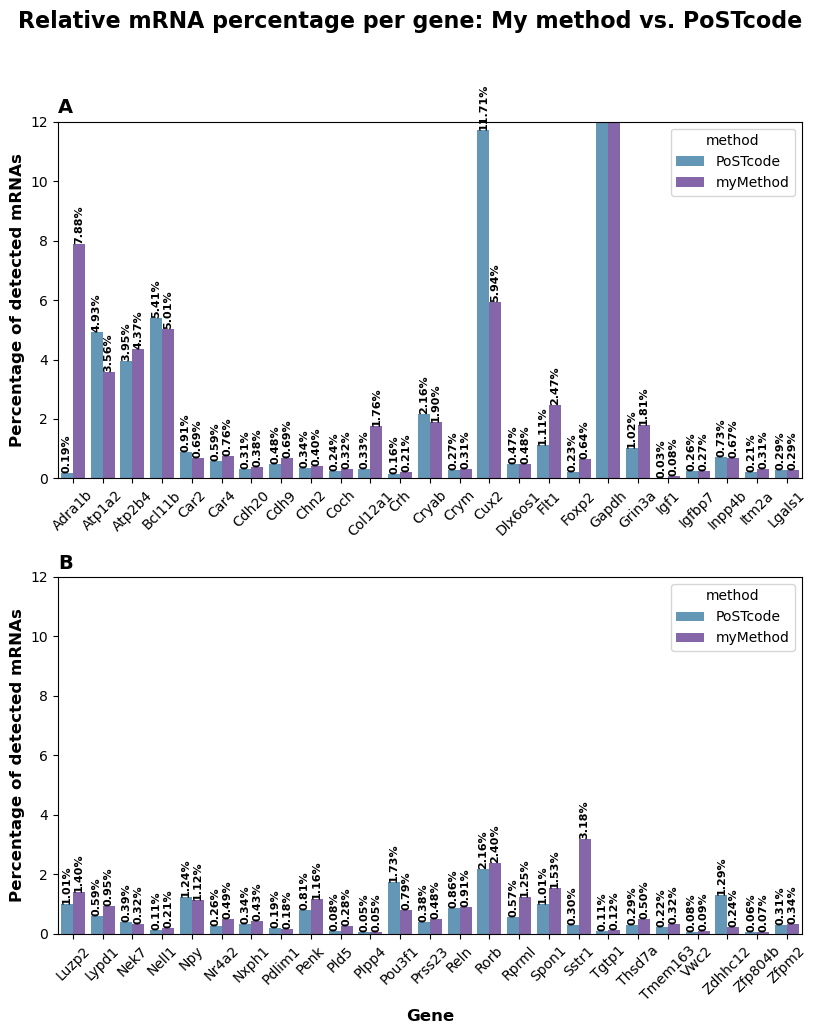

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your filtered data
df_own = pd.read_csv("/Users/jonahofmann/onboarding-base-module/code/barcode_decoding_results.csv")
df_own = df_own[~df_own["gene"].isin(["invalid", "infeasible", "background"])]

# Load and filter PoSTcode data
df_postcode = pd.read_csv("/Users/jonahofmann/onboarding-base-module/data/decoding/NT_ISS_KR0018_PoSTcode.csv")
df_postcode = df_postcode[~df_postcode["Name"].isin(["invalid", "infeasible", "background"])]

# Count per gene
own_counts = df_own["gene"].value_counts().reset_index()
own_counts.columns = ["gene", "count"]
own_counts["method"] = "myMethod"
own_counts["percentage"] = 100 * own_counts["count"] / own_counts["count"].sum()

postcode_counts = df_postcode["Name"].value_counts().reset_index()
postcode_counts.columns = ["gene", "count"]
postcode_counts["method"] = "PoSTcode"
postcode_counts["percentage"] = 100 * postcode_counts["count"] / postcode_counts["count"].sum()

# Combine
df_all = pd.concat([own_counts, postcode_counts], ignore_index=True)
df_all.sort_values(by=["gene", "method"], inplace=True)

# Split genes
genes = df_all["gene"].unique()
half = len(genes) // 2
genes_A = genes[:half]
genes_B = genes[half:]

# A4 Layout
fig, axes = plt.subplots(2, 1, figsize=(8.3, 10.5), sharey=True)

# Define custom color palette
palette = {
    "myMethod": "#845cb4",
    "PoSTcode": "#5799c2"
}

# Plot function with annotations
def plot_with_annotations(ax, data, title_label, show_xlabel=False):
    sns.barplot(data=data, x="gene", y="percentage", hue="method", ax=ax, palette=palette)
    ax.set_title(title_label, loc="left", fontsize=14, fontweight='bold')
    ax.set_ylabel("Percentage of detected mRNAs", fontsize=12, fontweight='bold')
    ax.tick_params(axis="x", rotation=45)
    ax.set_ylim(0, 12)

    if show_xlabel:
        ax.set_xlabel("Gene", fontsize=12, fontweight='bold')
    else:
        ax.set_xlabel("")

    # Annotate bars with percentage
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if not pd.isna(height) and height > 0:
                ax.annotate(f"{height:.2f}%", 
                            (bar.get_x() + bar.get_width() / 2, height),
                            ha="center", va="bottom", fontsize=8, rotation=90, fontweight='bold',)

# Plot A (no x-label)
plot_with_annotations(axes[0], df_all[df_all["gene"].isin(genes_A)], "A", show_xlabel=False)

# Plot B (with x-label)
plot_with_annotations(axes[1], df_all[df_all["gene"].isin(genes_B)], "B", show_xlabel=True)

# Main title
fig.suptitle("Relative mRNA percentage per gene: My method vs. PoSTcode", fontsize=16, fontweight='bold')

# Layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("relative_mRNA_percentage_comparison_annotated_A4_limited_final.pdf")
plt.show()




In [22]:
import pandas as pd

df_own = pd.read_csv("/Users/jonahofmann/onboarding-base-module/code/barcode_decoding_results.csv")
df_postcode = pd.read_csv("/Users/jonahofmann/onboarding-base-module/data/decoding/NT_ISS_KR0018_PoSTcode.csv")
df_own = df_own[~df_own["gene"].isin(["invalid", "infeasible", "background"])]
df_postcode = df_postcode[~df_postcode["Name"].isin(["invalid", "infeasible", "background"])]

own_counts = df_own["gene"].value_counts(normalize=True).rename("own_percent") * 100
postcode_counts = df_postcode["Name"].value_counts(normalize=True).rename("postcode_percent") * 100

comparison = pd.concat([own_counts, postcode_counts], axis=1).fillna(0)


comparison["abs_diff"] = (comparison["own_percent"] - comparison["postcode_percent"]).abs()

# highest and lowest values of myMethod
max_own = comparison["own_percent"].idxmax(), comparison["own_percent"].max()
min_own = comparison[comparison["own_percent"] > 0]["own_percent"].idxmin(), comparison["own_percent"].min()

# Find the gene with the largest absolute difference
most_diff_gene = comparison["abs_diff"].idxmax()
most_diff_value = comparison.loc[most_diff_gene, "abs_diff"]

print("✅ Most frequent gene in your method:", max_own)
print("✅ Least frequent gene in your method (non-zero):", min_own)
print(f" Largest percentage difference with PoSTcode: {most_diff_gene} ({most_diff_value:.2f}%)")



✅ Most frequent gene in your method: ('Gapdh', 40.01944922363401)
✅ Least frequent gene in your method (non-zero): ('Plpp4', 0.05022601707684581)
 Largest percentage difference with PoSTcode: Gapdh (9.20%)
